In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("dataset.csv",parse_dates=['date'])

**Data Preprocessing :-**

In [7]:
df.shape

(72946, 10)

In [ ]:

df.head()
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   72946 non-null  int64         
 1   open         72946 non-null  float64       
 2   high         72946 non-null  float64       
 3   low          72946 non-null  float64       
 4   close        72946 non-null  float64       
 5   volume       72946 non-null  float64       
 6   marketCap    72946 non-null  float64       
 7   timestamp    72946 non-null  object        
 8   crypto_name  72946 non-null  object        
 9   date         72946 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 5.6+ MB


Unnamed: 0     0
open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64

**EXPLORATORY DATA ANALYSIS:-**

Columns after cleaning: ['open', 'high', 'low', 'close', 'volume', 'market_cap', 'timestamp', 'symbol', 'date']

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   open        72946 non-null  float64       
 1   high        72946 non-null  float64       
 2   low         72946 non-null  float64       
 3   close       72946 non-null  float64       
 4   volume      72946 non-null  float64       
 5   market_cap  72946 non-null  float64       
 6   timestamp   72946 non-null  object        
 7   symbol      72946 non-null  object        
 8   date        72946 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 5.0+ MB
None

--- Summary Statistics ---
               open          high           low         close        volume  \
count  72946.000000  7.294600e+04  72946.000000

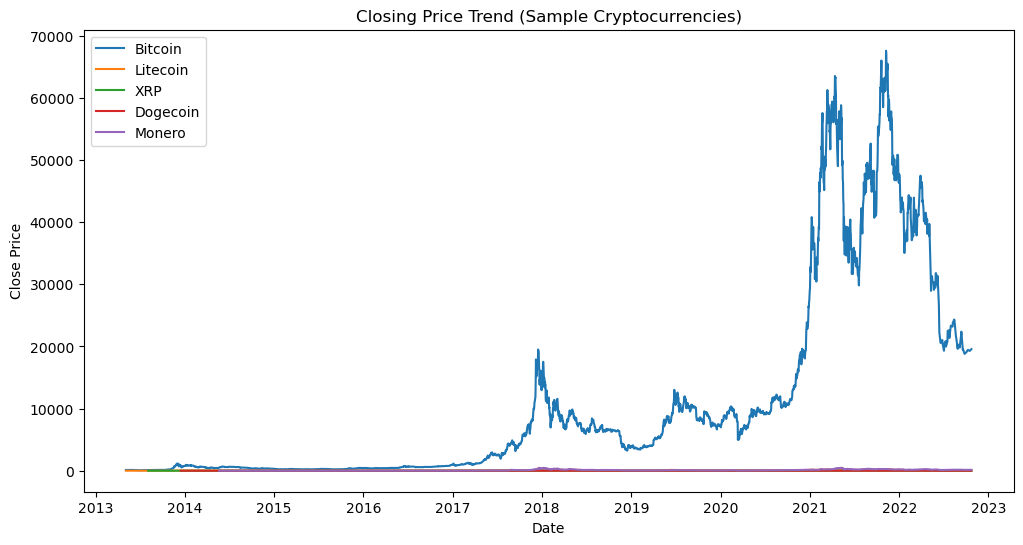

C:\Users\91878\AppData\Local\Temp\ipykernel_22776\2213965459.py:62: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df["log_return"] = df.groupby("symbol")["close"].apply(lambda x: np.log(x) - np.log(x.shift(1)))


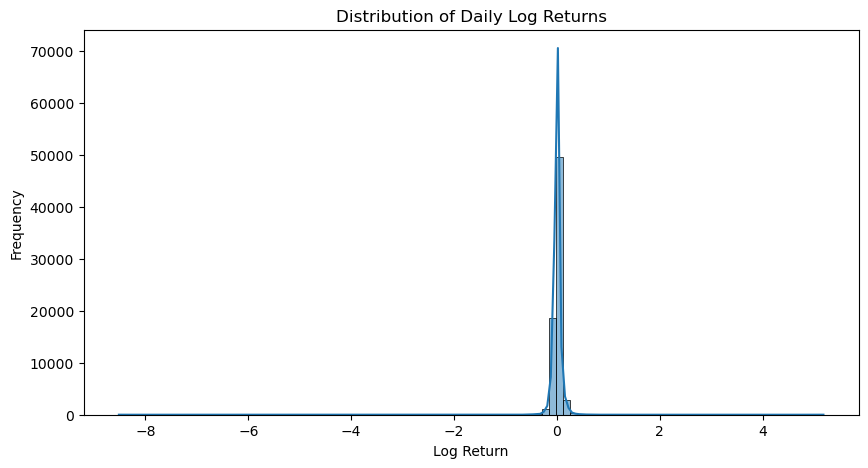

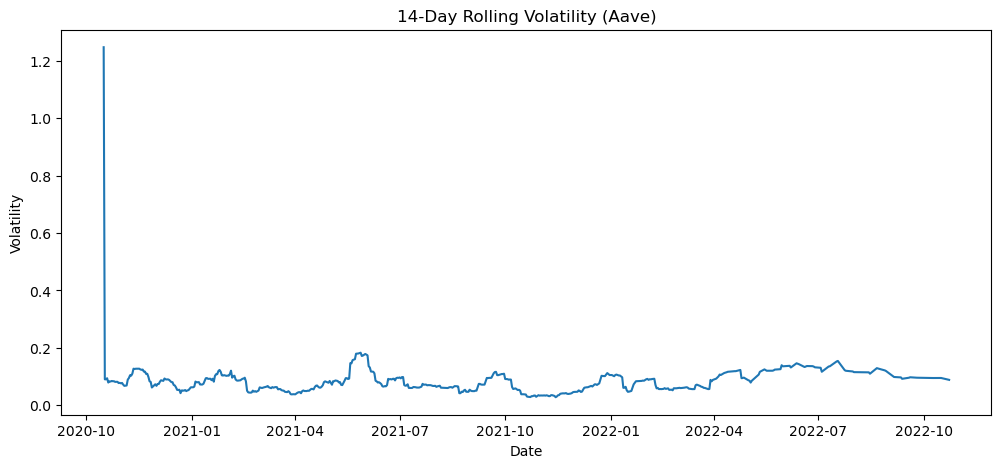

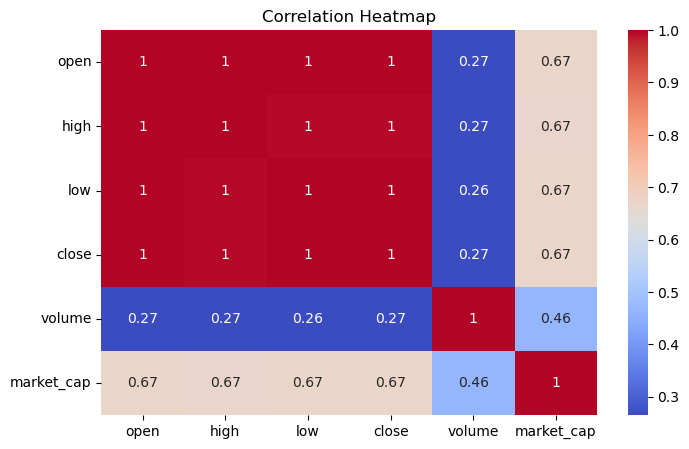

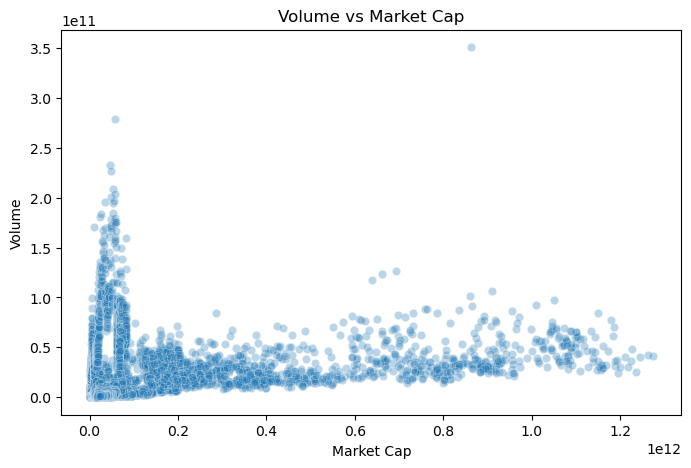


EDA Completed Successfully!


In [ ]:
 

 
# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Drop unwanted index column
if "unnamed: 0" in df.columns:
    df = df.drop(columns=["unnamed: 0"])

# Standardize column names
df.rename(columns={
    "crypto_name": "symbol",
    "marketcap": "market_cap"
}, inplace=True)

print("Columns after cleaning:", df.columns.tolist())

# ------------------------------------------
# Basic Info & Summary
# ------------------------------------------
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
print(df.isna().sum())

# ------------------------------------------
# Unique Cryptocurrencies
# ------------------------------------------
if "symbol" in df.columns:
    print("\nUnique cryptocurrencies (symbols):", df["symbol"].nunique())
    print("Symbols:", df["symbol"].unique())
else:
    print("\nERROR: No 'symbol' column found!")

# ------------------------------------------
# Price Trend of Sample Symbols
# ------------------------------------------
sample_symbols = df["symbol"].unique()[:5]

plt.figure(figsize=(12,6))
for sym in sample_symbols:
    coin = df[df["symbol"] == sym].sort_values("date")
    plt.plot(coin["date"], coin["close"], label=sym)

plt.title("Closing Price Trend (Sample Cryptocurrencies)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# ------------------------------------------
# Log Return Distribution
# ------------------------------------------
df = df.sort_values(["symbol", "date"])
df["log_return"] = df.groupby("symbol")["close"].apply(lambda x: np.log(x) - np.log(x.shift(1)))

plt.figure(figsize=(10,5))
sns.histplot(df["log_return"].dropna(), bins=100, kde=True)
plt.title("Distribution of Daily Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.show()

# ------------------------------------------
# Rolling Volatility (Example Symbol)
# ------------------------------------------
example_symbol = df["symbol"].unique()[0]
example_coin = df[df["symbol"] == example_symbol].sort_values("date").copy()

example_coin["rolling_vol_14"] = example_coin["log_return"].rolling(14).std()

plt.figure(figsize=(12,5))
plt.plot(example_coin["date"], example_coin["rolling_vol_14"])
plt.title(f"14-Day Rolling Volatility ({example_symbol})")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

# ------------------------------------------
# Correlation Heatmap
# ------------------------------------------
num_cols = ["open", "high", "low", "close", "volume", "market_cap"]

plt.figure(figsize=(8,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ------------------------------------------
# Volume vs Market Cap Scatter Plot
# ------------------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="market_cap", y="volume", alpha=0.3)
plt.title("Volume vs Market Cap")
plt.xlabel("Market Cap")
plt.ylabel("Volume")
plt.show()

print("\nEDA Completed Successfully!")


**FEATURE ENGINEERING :-**

In [ ]:
# ==========================================
#      STEP 4 : FEATURE ENGINEERING
# ==========================================

import pandas as pd
import numpy as np

# Assuming df from previous step is already loaded and cleaned
# If not loaded, run:
# df = pd.read_csv("data/dataset.csv", parse_dates=["date"])

# Ensure data is sorted by symbol and date
df = df.sort_values(["symbol", "date"]).reset_index(drop=True)

# ------------------------------------------
# 1. Log Returns
# ------------------------------------------
df["log_return"] = df.groupby("symbol")["close"].apply(
    lambda x: np.log(x) - np.log(x.shift(1))
)

# ------------------------------------------
# 2. Lag Features (previous days' returns)
# ------------------------------------------
df["log_return_1"] = df.groupby("symbol")["log_return"].shift(1)
df["log_return_2"] = df.groupby("symbol")["log_return"].shift(2)
df["log_return_3"] = df.groupby("symbol")["log_return"].shift(3)

# ------------------------------------------
# 3. Rolling Volatility Features
# ------------------------------------------
df["vol_7"]  = df.groupby("symbol")["log_return"].rolling(7).std().reset_index(level=0, drop=True)
df["vol_14"] = df.groupby("symbol")["log_return"].rolling(14).std().reset_index(level=0, drop=True)
df["vol_30"] = df.groupby("symbol")["log_return"].rolling(30).std().reset_index(level=0, drop=True)

# ------------------------------------------
# 4. Moving Averages (MA) and Moving Std
# ------------------------------------------
df["ma_7"]  = df.groupby("symbol")["close"].rolling(7).mean().reset_index(level=0, drop=True)
df["ma_14"] = df.groupby("symbol")["close"].rolling(14).mean().reset_index(level=0, drop=True)
df["ma_30"] = df.groupby("symbol")["close"].rolling(30).mean().reset_index(level=0, drop=True)

df["std_7"]  = df.groupby("symbol")["close"].rolling(7).std().reset_index(level=0, drop=True)
df["std_14"] = df.groupby("symbol")["close"].rolling(14).std().reset_index(level=0, drop=True)

# ------------------------------------------
# 5. Liquidity Ratio
# ------------------------------------------
df["liquidity_ratio"] = df["volume"] / (df["market_cap"] + 1e-9)

# ------------------------------------------
# 6. Technical Indicators
# ------------------------------------------

# ATR (Average True Range)
df["tr"] = df["high"] - df["low"]  # simplified TR
df["atr_14"] = df.groupby("symbol")["tr"].rolling(14).mean().reset_index(level=0, drop=True)

# Bollinger Band Width
rolling_mean_20 = df.groupby("symbol")["close"].rolling(20).mean().reset_index(level=0, drop=True)
rolling_std_20  = df.groupby("symbol")["close"].rolling(20).std().reset_index(level=0, drop=True)
df["bb_width"] = (rolling_std_20 * 2) / rolling_mean_20

# ------------------------------------------
# 7. Daily Range %
# ------------------------------------------
df["range_pct"] = (df["high"] - df["low"]) / df["open"]

# ------------------------------------------
# 8. Calendar Features
# ------------------------------------------
df["day_of_week"] = df["date"].dt.dayofweek
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

# ------------------------------------------
# 9. Target Variable: Future Volatility (Next-Day)
# ------------------------------------------
df["future_volatility"] = df.groupby("symbol")["vol_14"].shift(-1)

# Safe function to create volatility label
def safe_qcut(x):
    x = x.copy()
    if x.dropna().nunique() < 2:  # Not enough values to split
        return pd.Series(["normal"] * len(x), index=x.index)
    return pd.qcut(x, q=[0, 0.8, 1], labels=["normal", "high"])

# Create classification target
df["vol_label"] = df.groupby("symbol")["future_volatility"].transform(safe_qcut)

# ------------------------------------------
# 10. Final Cleanup
# ------------------------------------------
df = df.dropna().reset_index(drop=True)

print("Feature engineering completed!")
print("\nFinal columns:")
print(df.columns.tolist())

df.head()


C:\Users\91878\AppData\Local\Temp\ipykernel_22776\810000586.py:18: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df["log_return"] = df.groupby("symbol")["close"].apply(


Feature engineering completed!

Final columns:
['open', 'high', 'low', 'close', 'volume', 'market_cap', 'timestamp', 'symbol', 'date', 'log_return', 'log_return_1', 'log_return_2', 'log_return_3', 'vol_7', 'vol_14', 'vol_30', 'ma_7', 'ma_14', 'ma_30', 'std_7', 'std_14', 'liquidity_ratio', 'tr', 'atr_14', 'bb_width', 'range_pct', 'day_of_week', 'day', 'month', 'year', 'future_volatility', 'vol_label']


,open,high,low,close,volume,market_cap,timestamp,symbol,date,log_return,...,tr,atr_14,bb_width,range_pct,day_of_week,day,month,year,future_volatility,vol_label
0,29.707518,31.067060,28.494482,30.657276,4.956834e+07,3.454655e+08,2020-11-01T23:59:59.999Z,Aave,2020-11-01,0.031470,...,2.572578,4.302885,0.335911,0.086597,6,1,11,2020,0.071796,normal
1,30.657282,33.923585,29.344650,29.731524,8.718015e+07,3.353497e+08,2020-11-02T23:59:59.999Z,Aave,2020-11-02,-0.030662,...,4.578936,4.269679,0.311496,0.149359,0,2,11,2020,0.067392,normal
2,29.731526,30.062917,27.537111,28.042803,5.677501e+07,3.164555e+08,2020-11-03T23:59:59.999Z,Aave,2020-11-03,-0.058476,...,2.525806,4.148810,0.272969,0.084954,1,3,11,2020,0.068588,normal
3,27.715080,32.303040,25.966155,30.955627,8.521241e+07,3.502055e+08,2020-11-05T23:59:59.999Z,Aave,2020-11-05,0.098823,...,6.336885,4.242155,0.257477,0.228644,3,5,11,2020,0.089112,normal
4,30.955118,40.769075,30.855128,38.457441,1.473047e+08,4.358764e+08,2020-11-06T23:59:59.999Z,Aave,2020-11-06,0.216997,...,9.913947,4.502619,0.254839,0.320268,4,6,11,2020,0.094659,normal


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df from Step 4 is ready and sorted by ['symbol', 'date']
df = df.sort_values(['symbol', 'date']).reset_index(drop=True)

# Define empty DataFrames to collect splits
train_df = pd.DataFrame()
val_df = pd.DataFrame()
test_df = pd.DataFrame()

# Split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Loop through each symbol to do time-based split
for symbol, group in df.groupby('symbol'):
    n = len(group)
    train_end = int(n * train_ratio)
    val_end = int(n * (train_ratio + val_ratio))
    
    train_df = pd.concat([train_df, group.iloc[:train_end]])
    val_df = pd.concat([val_df, group.iloc[train_end:val_end]])
    test_df = pd.concat([test_df, group.iloc[val_end:]])

# Reset indices
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print("Train size:", len(train_df))
print("Validation size:", len(val_df))
print("Test size:", len(test_df))


Train size: 49836
Validation size: 10690
Test size: 10714


In [27]:
#7a. Baseline: RandomForest Classifier for high volatility
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import classification_report

# Features to use
features = ["log_return_1","vol_7","vol_14","atr_14","bb_width","range_pct","day_of_week"]
X = df[features]
y = df["vol_label"].map({"normal":0, "high":1})

# Drop rows with NaNs
mask = X.notnull().all(axis=1) & y.notnull()
X = X[mask]; y = y[mask]

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")

for train_idx, val_idx in tscv.split(X):
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    preds = model.predict(X.iloc[val_idx])
    print(classification_report(y.iloc[val_idx], preds))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      9483
           1       0.74      0.84      0.79      2390

    accuracy                           0.91     11873
   macro avg       0.85      0.88      0.86     11873
weighted avg       0.91      0.91      0.91     11873

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      9679
           1       0.77      0.65      0.71      2194

    accuracy                           0.90     11873
   macro avg       0.85      0.80      0.82     11873
weighted avg       0.90      0.90      0.90     11873

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      9540
           1       0.80      0.70      0.75      2333

    accuracy                           0.91     11873
   macro avg       0.86      0.83      0.84     11873
weighted avg       0.90      0.91      0.90     11873

              preci

In [29]:
# Regression Example (predicting future_volatility)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X_reg = df[features]
y_reg = df["future_volatility"]

# Remove rows with missing values
mask = X_reg.notnull().all(axis=1) & y_reg.notnull()
X_reg = X_reg[mask]
y_reg = y_reg[mask]

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
model_reg = RandomForestRegressor(n_estimators=200, random_state=42)

# Lists to store metrics
rmse_list, mae_list, r2_list = [], [], []

# Loop through folds
for i, (train_idx, val_idx) in enumerate(tscv.split(X_reg), 1):
    X_train, X_val = X_reg.iloc[train_idx], X_reg.iloc[val_idx]
    y_train, y_val = y_reg.iloc[train_idx], y_reg.iloc[val_idx]
    
    model_reg.fit(X_train, y_train)
    preds = model_reg.predict(X_val)
    
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    mae = mean_absolute_error(y_val, preds)
    r2 = r2_score(y_val, preds)
    
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)
    
    print(f"Fold {i} Metrics:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R2:   {r2:.4f}\n")

# Print average metrics
print("Average Metrics Across All Folds:")
print(f"  RMSE: {np.mean(rmse_list):.4f}")
print(f"  MAE:  {np.mean(mae_list):.4f}")
print(f"  R2:   {np.mean(r2_list):.4f}")


Fold 1 Metrics:
  RMSE: 0.0130
  MAE:  0.0054
  R2:   0.9132

Fold 2 Metrics:
  RMSE: 0.0091
  MAE:  0.0047
  R2:   0.9386

Fold 3 Metrics:
  RMSE: 0.0089
  MAE:  0.0045
  R2:   0.9401

Fold 4 Metrics:
  RMSE: 0.0789
  MAE:  0.0087
  R2:   0.4721

Fold 5 Metrics:
  RMSE: 0.0081
  MAE:  0.0039
  R2:   0.9578

Average Metrics Across All Folds:
  RMSE: 0.0236
  MAE:  0.0055
  R2:   0.8444


**MODEL TESTING :-**

In [32]:
# CLassification
from sklearn.metrics import confusion_matrix, roc_auc_score

preds = model.predict(X)
print("Confusion Matrix:\n", confusion_matrix(y, preds))
print("ROC-AUC:", roc_auc_score(y, model.predict_proba(X)[:,1]))


Confusion Matrix:
 [[56934   392]
 [  683 13231]]
ROC-AUC: 0.9933825899620294


In [31]:
# Regression
preds = model_reg.predict(X_reg)
print("RMSE:", np.sqrt(mean_squared_error(y_reg, preds)))
print("MAE:", mean_absolute_error(y_reg, preds))
print("R2:", r2_score(y_reg, preds))


RMSE: 0.006530967543982478
MAE: 0.00204488287613445
R2: 0.9868367317436613


**HYPERPARAMETER TUNING :-**

In [ ]:

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

tscv = TimeSeriesSplit(n_splits=3)
rf = RandomForestClassifier(class_weight="balanced", random_state=42)
search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10,
                            scoring="f1", cv=tscv, verbose=1, n_jobs=-1)
search.fit(X, y)
print("Best params:", search.best_params_)
print("Best F1 score:", search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}
Best F1 score: 0.7524949981577441


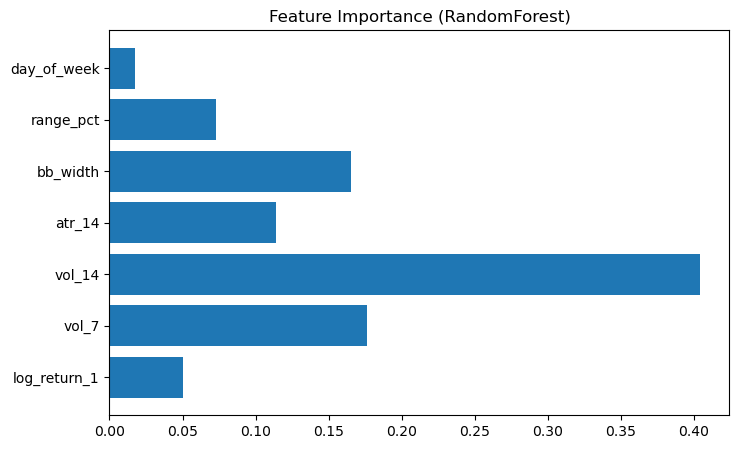

In [35]:
# Model Explainability
import matplotlib.pyplot as plt

# RandomForest feature importance
importances = model.feature_importances_
feat_names = X.columns
plt.figure(figsize=(8,5))
plt.barh(feat_names, importances)
plt.title("Feature Importance (RandomForest)")
plt.show()
